In [64]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [65]:
path="/content/drive/MyDrive/DL Datasets/churn_modelling.csv"

In [66]:
df=pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
x = df.iloc[:,3:13]
y = df['Exited']

In [68]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [69]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [70]:
geo = pd.get_dummies(x['Geography'],drop_first=True)
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [71]:
gen = pd.get_dummies(x['Gender'],drop_first=True)
gen

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [72]:
x = pd.concat([x,geo,gen],axis = 1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [73]:
x.drop(['Gender','Geography'],axis = 1,inplace = True)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [77]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [82]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
	keras.layers.Dense(32, input_shape=(11,), activation='relu'),
	keras.layers.Dense(16, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', 
	          loss='binary_crossentropy',
	          metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 338.9255 - accuracy: 0.6774
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 99.4519 - accuracy: 0.6780
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 50.4594 - accuracy: 0.6790
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 66.5480 - accuracy: 0.6720
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 79.2491 - accuracy: 0.6744
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 67.9253 - accuracy: 0.6845
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 62.4248 - accuracy: 0.6764
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 63.6320 - accuracy: 0.6711
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 57.2482 - accuracy: 0.6780
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 61.7552 - accur

In [83]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 20.6277 - accuracy: 0.8075


[20.62766456604004, 0.8075000047683716]

In [84]:
y_pred = model.predict(x_test)
y_pred

array([[0.0000000e+00],
       [5.2842507e-36],
       [0.0000000e+00],
       ...,
       [0.0000000e+00],
       [4.3784857e-24],
       [6.6039792e-30]], dtype=float32)

In [85]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1617,    0],
       [ 383,    0]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

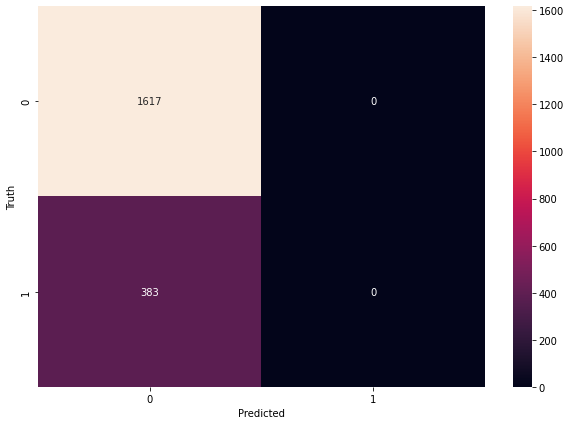

In [87]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
from sklearn.metrics import classification_report
print('Classification Report: \n', classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1617
           1       0.00      0.00      0.00       383

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
